In [30]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [23]:
data = scipy.io.loadmat(f'./data/S1/S1_E1_A1.mat')
for i, key in enumerate(data.keys()):
    print(f'{i}: {key}')

print(data['emg'].shape)

0: __header__
1: __version__
2: __globals__
3: emg
4: acc
5: stimulus
6: glove
7: subject
8: exercise
9: repetition
10: restimulus
11: rerepetition
12: age
13: circumference
14: frequency
15: gender
16: height
17: weight
18: laterality
19: sensor
(130267, 16)


In [ ]:
# Get the data from the DB1
for i in range(1, 2):
    for j in range(1, 3):
        # read .mat file
        data = scipy.io.loadmat(f'./data/S{i}/S{i}_E{j}_A{i}.mat')

        # get the data from the dictionary
        emg = data['']
        restimulus = data['restimulus'].ravel()
        rerepetition = data['rerepetition'].ravel()

        
        df_emg = pd.DataFrame(emg)
        # df_emg['restimulus'] = restimulus
        # df_emg['rerepetition'] = rerepetition

    #    # join all the dataframes
    #     if i == 1 and j == 1:
    #         df = df_emg
    #     else:
    #         df = pd.concat([df, df_emg], axis=0)
        print(df_emg.head())

   0
0  1
   0
0  1


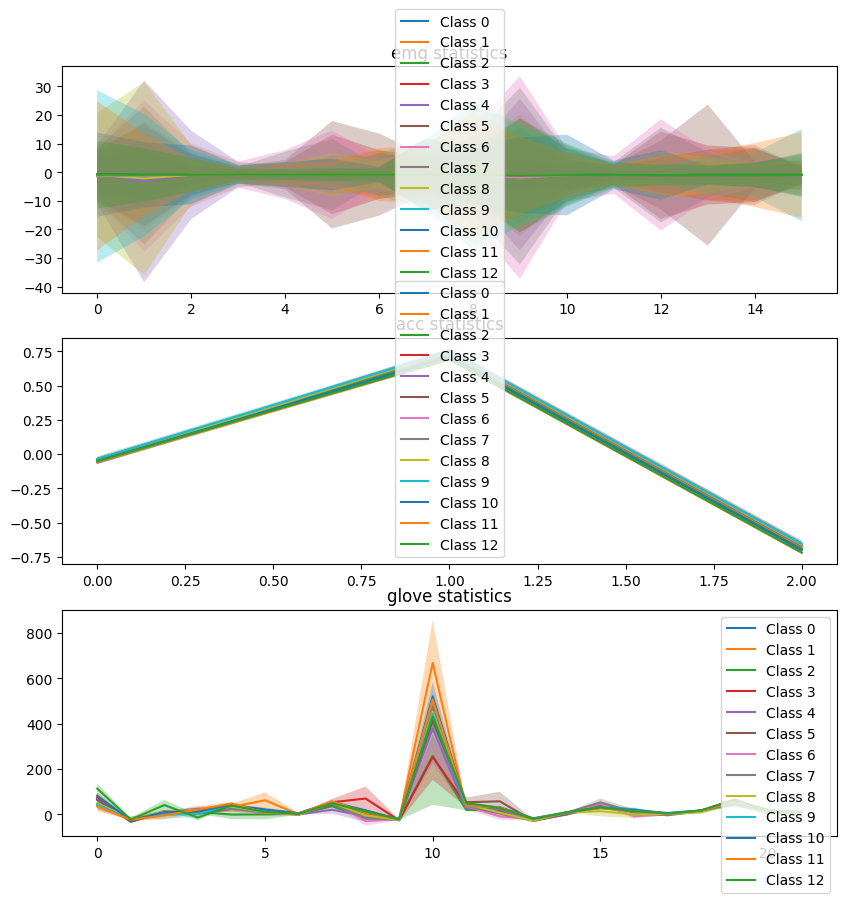

In [ ]:
def grouped_statistics(data, stimulus):
    unique_classes = np.unique(stimulus)
    stats = {}
    
    for cls in unique_classes:
        mask = stimulus.flatten() == cls
        filtered_data = data[mask]

        if filtered_data.size > 0:
            stats[cls] = {
                "mean": np.mean(filtered_data, axis=0),
                "std": np.std(filtered_data, axis=0),
                "min": np.min(filtered_data, axis=0),
                "max": np.max(filtered_data, axis=0)
            }
    
    return stats
mat_data = scipy.io.loadmat('./data/S1/S1_E1_A1.mat')

statistics_results = {}
stimulus_array = mat_data["stimulus"].flatten()

for key in ["emg", "acc", "glove"]:
    if key in mat_data and isinstance(mat_data[key], np.ndarray):
        statistics_results[key] = grouped_statistics(mat_data[key], stimulus_array)

# plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for i, key in enumerate(statistics_results.keys()):
    for cls, stats in statistics_results[key].items():
        axs[i].plot(stats["mean"], label=f"Class {cls}")
        axs[i].fill_between(
            range(len(stats["mean"])),
            stats["mean"] - stats["std"],
            stats["mean"] + stats["std"],
            alpha=0.3
        )

    axs[i].set_title(f"{key} statistics")
    axs[i].legend()
